In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
data = pd.read_csv('mbti_1.csv')

In [4]:
import numpy as np

def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

data['words_per_comment'] = data['posts'].apply(lambda x: len(x.split())/50)
data['variance_of_word_counts'] = data['posts'].apply(lambda x: var_row(x))

In [5]:
data.head()

,type,posts,words_per_comment,variance_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576


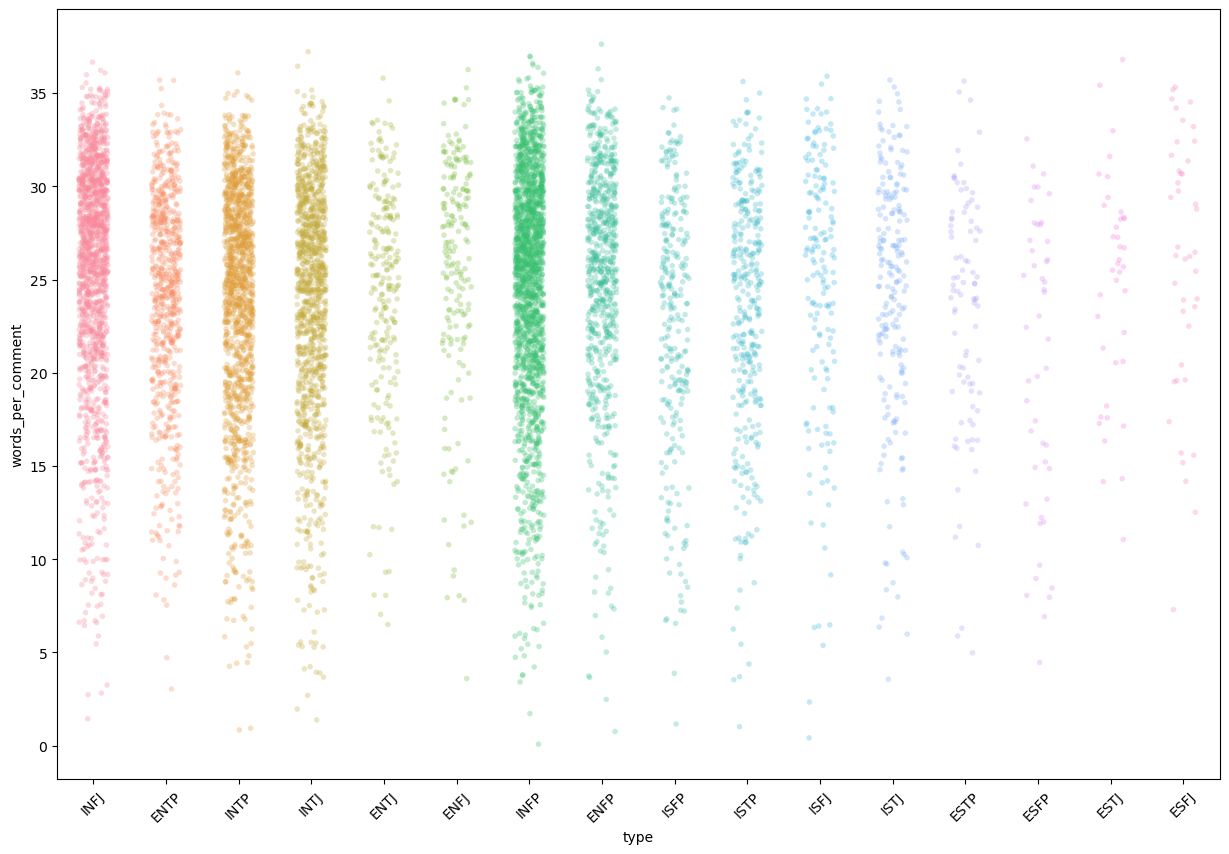

In [6]:
plt.figure(figsize=(15, 10))
sns.stripplot(x="type", y="words_per_comment", data=data, alpha=0.3, size=4, jitter=0.2)
plt.xticks(rotation=45) 
plt.show()

In [7]:
# Tokenization
data['tokenized_posts'] = data['posts'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['filtered_posts'] = data['tokenized_posts'].apply(lambda x: [word for word in x if word.casefold() not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['lemmatized_posts'] = data['filtered_posts'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Convert the lemmatized posts back to string
data['preprocessed_posts'] = data['lemmatized_posts'].apply(' '.join)

In [8]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['preprocessed_posts'])

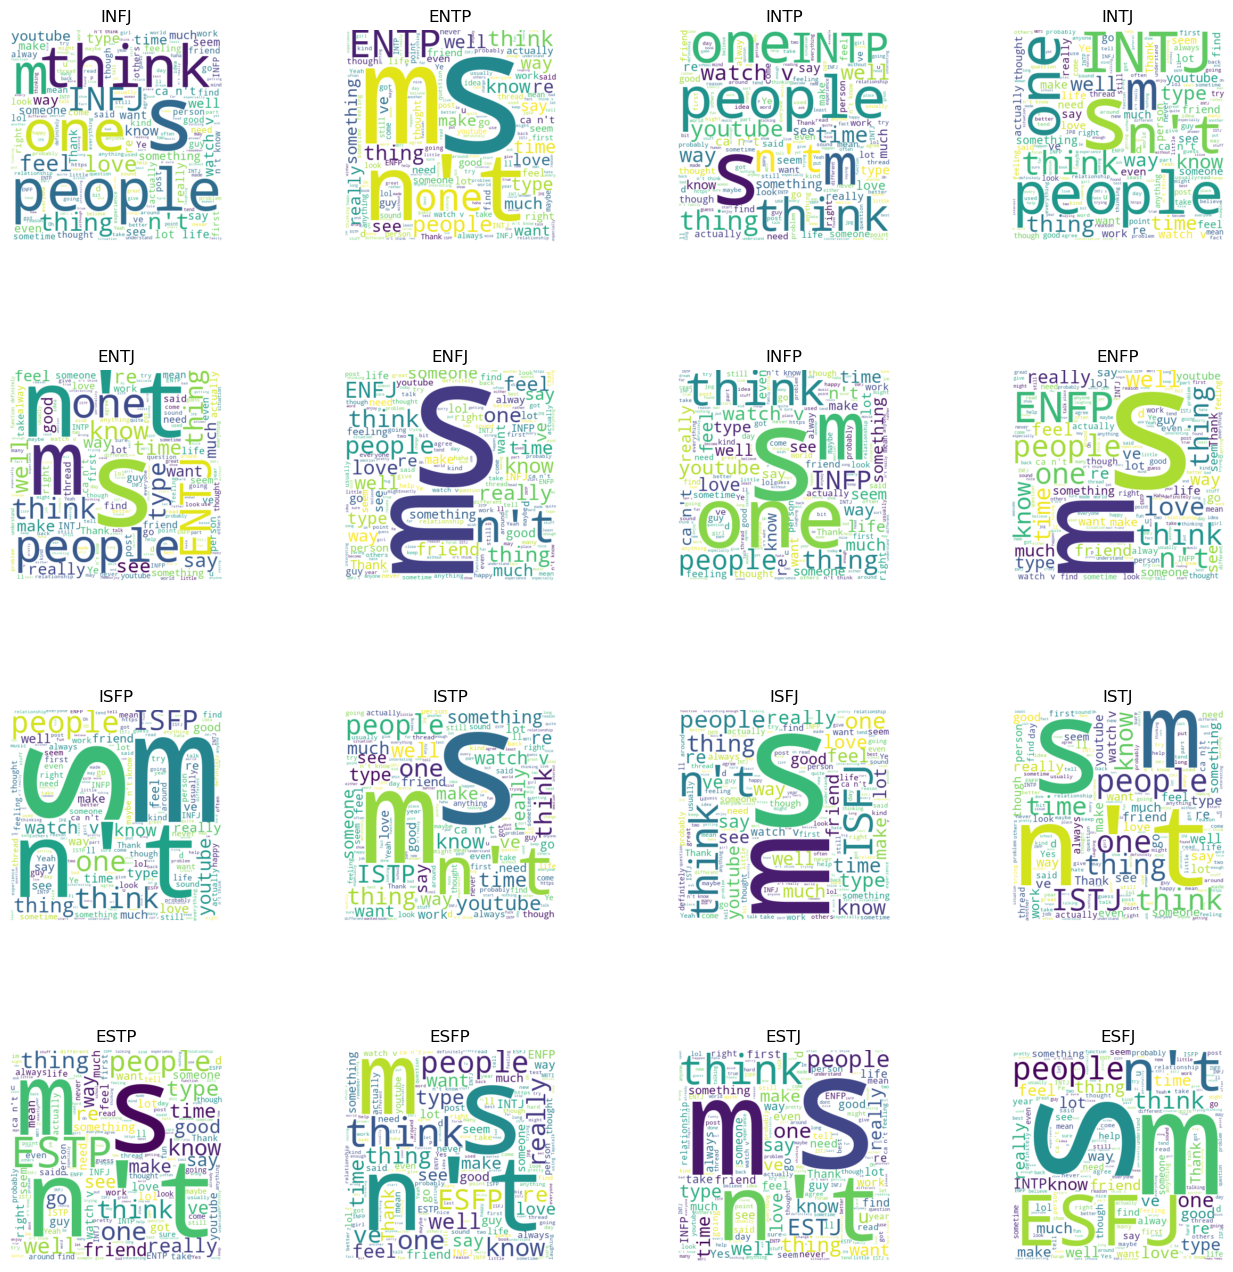

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a 4x4 grid for subplots
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Loop through each personality type
for i, personality_type in enumerate(data['type'].unique()):
    # Filter the posts for the current personality type
    posts = data[data['type'] == personality_type]['preprocessed_posts']
    
    # Combine all the posts into a single string
    combined_text = ' '.join(posts)
    
    # Generate the word cloud for the current personality type
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(combined_text)
    
    # Plot the word cloud for the current personality type
    ax = axes[i // 4, i % 4]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(personality_type)
    ax.axis('off')

# Display the grid of word clouds
plt.show()

In [10]:
columns_to_drop = ['tokenized_posts', 'filtered_posts', 'lemmatized_posts', 'preprocessed_posts']
data.drop(columns_to_drop, axis=1, inplace=True)

In [11]:
data.head()

,type,posts,words_per_comment,variance_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576
